**PROJECT OVERVIEW**
* In this project, data collected by a team of Polish economists studying bankruptcy is explored. 
* The goal is to build a model that can predict whether a company will go bankrupt or not.
* KEY LEARNING OBJECTIVES:
    1. Navigate a file system from the Linux command line
    2. Load and save files using Python
    3. Address imbalanced data using resampling techniques
    4. Evaluate a model using classification metrics like precision and recall

**SECTION OVERVIEW**
* Track corporate bnkrupties in Poland
* Decompress the JSON file using the command line
* Get data stored in a JSON file
* Explore the data then turn it into a DataFrame

**ML WORKFLOW**
* Preparing Data:
    * Open: a compressed JSON file
        * **command line, context handler**
    * Explore: 
        * What's JSON syntax **key-value pair**
        * Troubleshooting with Stack Overflow
    * Import: JSON data into a DataFrame

In [1]:
# Importing necessary libraries
import pandas as pd

import gzip # Used for compressing/decompressing files
import json # Getting JSON information into a format python can work with

# 1. Preparing Data
## 1.1 Opening File
* Step 1 is to access the file that contains the data we need
* Command line would be used for this purpose
### The Command Line
* Some key commands
    * `pwd`: shows the present working directory
    * `cd`: changes directory to the desired directory
    * `ls`: shows a list of items in the pwd
    * pressing tab autocompletes the name of file/folder in a directory
    * `cd ..`: takes back to the parent directory from pwd
    * `clear`: clears the screen

### Decompressing `.gz` file in Command Line
* List of common gzip commands
* 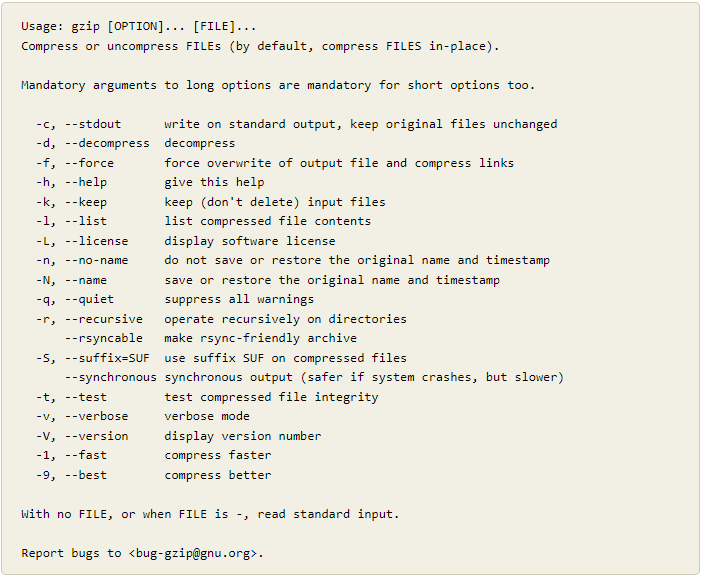
* `gzip -dfk poland-bankruptcy-data-2009.json.gz` command is used 
    * `d:` decompresses the gzip file
    * `f:` force overwrite of output file if another file with name preexits in directory
    * `k:` keeps the original compressed file
* json file is the decompressed output

### Using Terminal Commands in Jupyter: Decompressing files
* `%%bash` interprets whatever proceeds it as Terminal/Shell/Bash Code
* The command below gives the same output from inside the Jupyter notebook
* 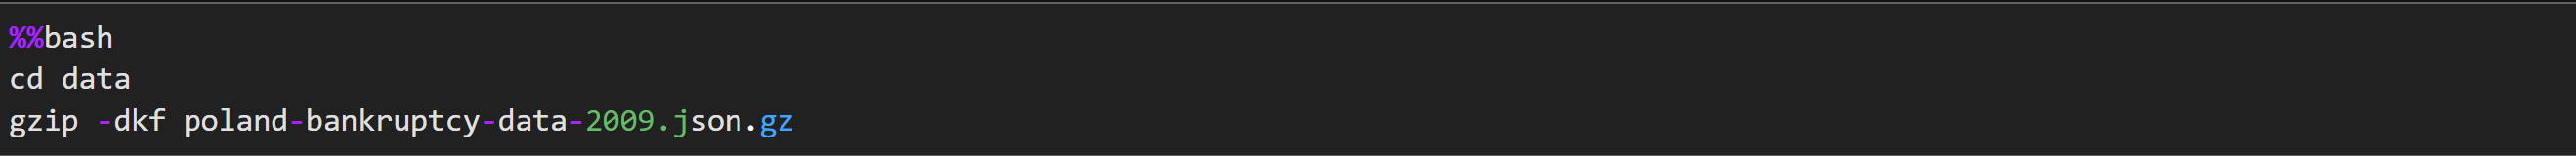

## 1.2 Exploring Data
### Inspecting JSON: Command Line

* elements in a JSON file must always be in double quoatation marks `""`. In python they can be used interchangeably however
* In JSON Boolean `false` is with lowercase `f` whereas in Python it is `False` with uppercase `F`
* 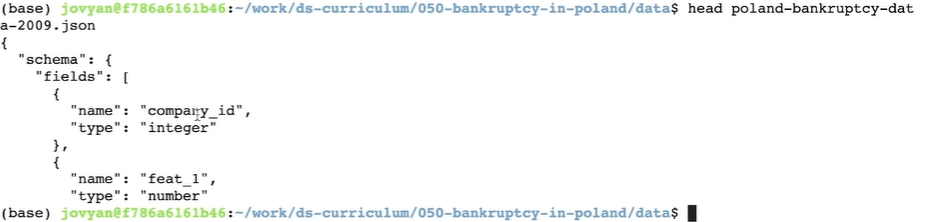
* using `head` command in terminal gives out the first 10 lines for a JSON file
* Structure of a JSON file is in form of a dictionary

### Inspecting JSON: Jupyter

* This is how a JSON file looks like in Jupyter environment
* 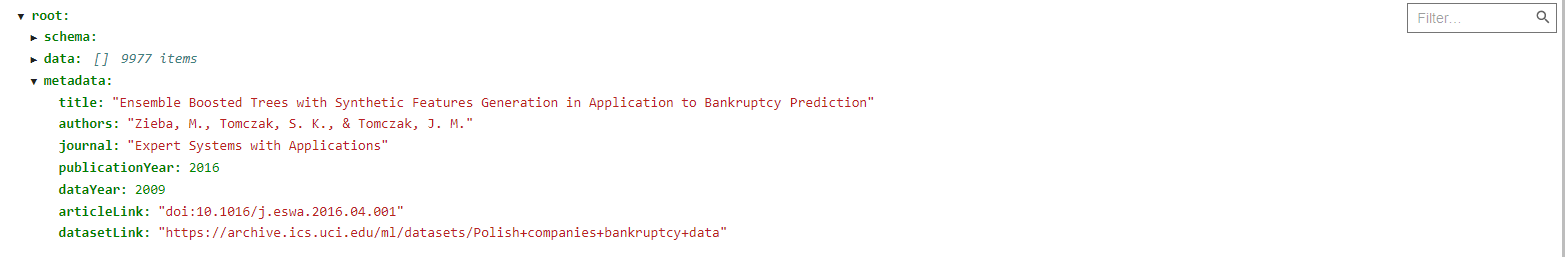
* JSON code can't be directly interpreted in Python. It needs to be translated
* The schema of the JSON file would be extremely helpful in case of complicated data schema to know how to import each of the different features into a pandas DataFrame

### Reading JSON
* **When faced with an error message, check Stack Overflow for explanations**
* There are three things to look for when browsing through solutions on Stack Overflow.
    1. **Context:** A good question is specific; a **specific** question gives some relevant information about its OS and hardware, and then offers the code that threw the error. That's important, because...
    2. **Reproducible Code:** A good question also includes enough information to reproduce the problem. After all, the only way to make sure the solution actually applies to situation is to see if the code in the question throws the error you're having trouble with! In this case, the person included not only the code they used to get the error, but the actual error message itself. That would be useful on its own, but since you're looking for an actual solution to your problem, you're really looking for...
    3. **An answer:** Not every question on Stack Overflow gets answered. There's a big green check mark next to the first solution, which means that the person who asked the question thought that solution was the best one.

In [5]:
# Opening and reading JSON file.'r' means we are opening file with read permissions only to avoid overwriting
with open ('poland-bankruptcy-data-2009.json', 'r') as read_file:
    poland_data = json.load(read_file)
print(type(poland_data))

<class 'dict'>


It can be seen that the file has been loaded in the form of a dictionary

### Printing Keys
**Keys** in a dictionary are categories of things in a dataset

In [6]:
poland_data.keys()

dict_keys(['schema', 'data', 'metadata'])

`schema` is how the data is structured, `metadata` indicates where the data comes from, and `data` is the data itself.

### Exploring Dictionary
* **values** in a dictionary are ways to describe the variable that belongs to a key.

In [7]:
# Checking metadata
poland_data['metadata']

{'title': 'Ensemble Boosted Trees with Synthetic Features Generation in Application to Bankruptcy Prediction',
 'authors': 'Zieba, M., Tomczak, S. K., & Tomczak, J. M.',
 'journal': 'Expert Systems with Applications',
 'publicationYear': 2016,
 'dataYear': 2009,
 'articleLink': 'doi:10.1016/j.eswa.2016.04.001',
 'datasetLink': 'https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'}

In [9]:
# Exploring keys for schema
poland_data['schema'].keys()

dict_keys(['fields', 'primaryKey', 'pandas_version'])

In [10]:
# Checking the datatype for `data`
type(poland_data['data'])

list

In [11]:
# Exploring first item in the data list
poland_data['data'][0]

{'company_id': 1,
 'feat_1': 0.17419,
 'feat_2': 0.41299,
 'feat_3': 0.14371,
 'feat_4': 1.348,
 'feat_5': -28.982,
 'feat_6': 0.60383,
 'feat_7': 0.21946,
 'feat_8': 1.1225,
 'feat_9': 1.1961,
 'feat_10': 0.46359,
 'feat_11': 0.21946,
 'feat_12': 0.53139,
 'feat_13': 0.14233,
 'feat_14': 0.21946,
 'feat_15': 592.24,
 'feat_16': 0.6163,
 'feat_17': 2.4213,
 'feat_18': 0.21946,
 'feat_19': 0.12272,
 'feat_20': 37.573,
 'feat_21': 0.9969,
 'feat_22': 0.2951,
 'feat_23': 0.097402,
 'feat_24': 0.75641,
 'feat_25': 0.46359,
 'feat_26': 0.50669,
 'feat_27': 1.9737,
 'feat_28': 0.32417,
 'feat_29': 5.9473,
 'feat_30': 0.22493,
 'feat_31': 0.12272,
 'feat_32': 100.82,
 'feat_33': 3.6203,
 'feat_34': 0.71453,
 'feat_35': 0.2951,
 'feat_36': 1.8079,
 'feat_37': 123140.0,
 'feat_38': 0.46359,
 'feat_39': 0.16501,
 'feat_40': 0.21282,
 'feat_41': 0.041124,
 'feat_42': 0.16501,
 'feat_43': 95.682,
 'feat_44': 58.109,
 'feat_45': 0.94621,
 'feat_46': 0.90221,
 'feat_47': 44.941,
 'feat_48': 0.26003,

It can be seen that the JSON file has been successfully translated by Python because the boolean `false` has now become `False`

### Calculating Observations

In [12]:
# Calculating number of companies
len(poland_data['data'])

9977

This is the number of rows which should be in the DataFrame when this json is loaded onto it

### Calculating Features

In [13]:
# Calculating number of features associated with `company_1`
len(poland_data['data'][0])

66

One of the features is an index. So 65 features in total

### Checking Data Integrity
* Since we are exploring a JSON file, which is common for semi-structured data, it can't be assumed that all companies have the same features
* Need to Iterate through the compnanies in `poland_data['data']` list to check if they all have the same number of features

In [14]:
# Iterating through companies
for item in poland_data['data']:
    if len(item) != 66: # `not equals to` is written as `!=`
        print('ALERT!!')

### Loading Compressed File
* Using a context manager, compressed JSON file in .gz format can be opened and loaded as a dictionary
* 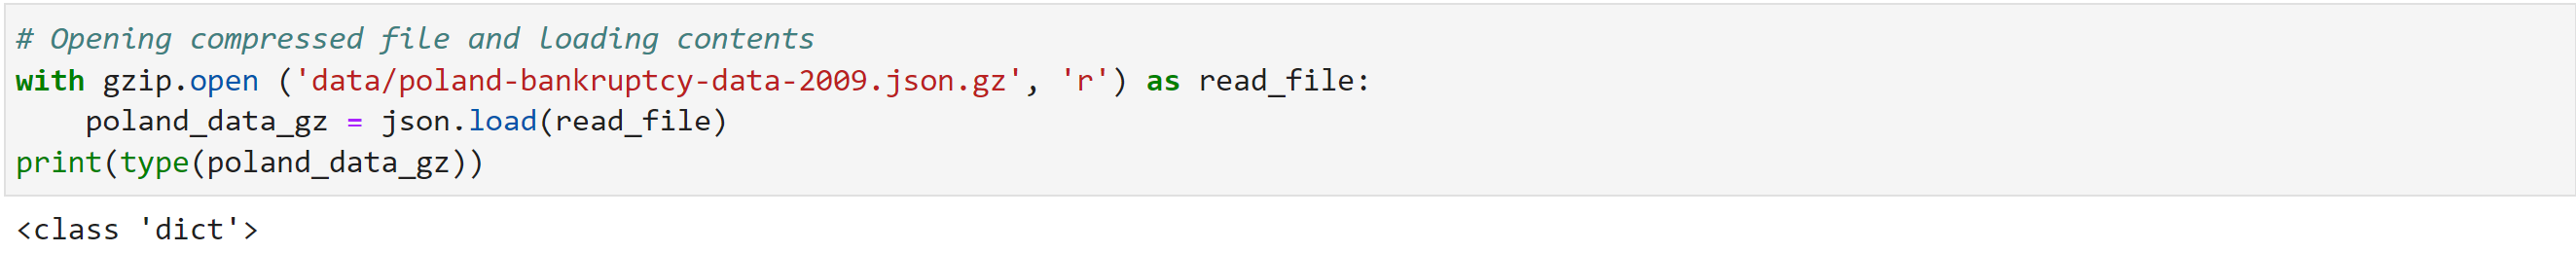
* Now it needs to be verified if the data are same in `poland_data` and `poland_data-gz`
* 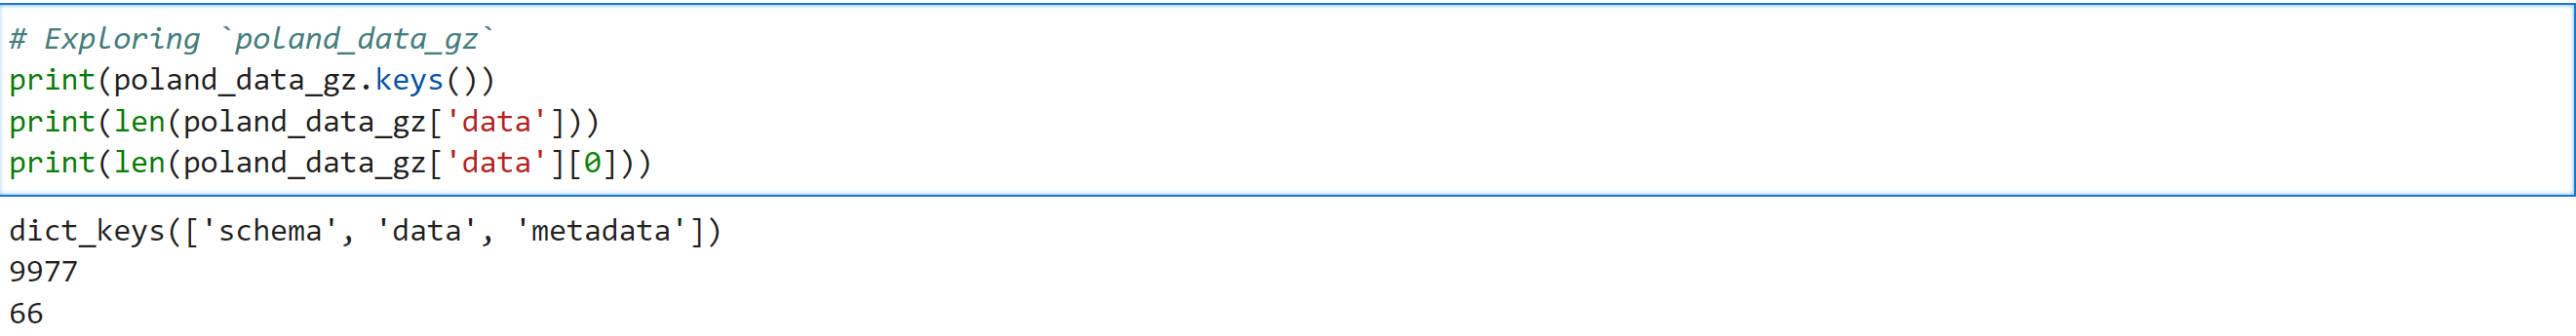
* Turns out they are indeed the same. So either way can be used

### Loading Dictionary into DataFrame
* Creating a DataFrame `df` that contains all companies in dataset, indexed by `company_id`

In [15]:
df = pd.DataFrame().from_dict(poland_data['data']).set_index('company_id')
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


## 1.3 Importing Data
### Wrangle Function

In [16]:
def wrangle(filename):
    # Opening compressed file, loading into dictionary
    with open (filename, 'r') as f:
        data = json.load(f)
    
    # Turning dictionary into a DataFrame
    df = pd.DataFrame().from_dict(data['data']).set_index('company_id')
    
    return df

In [17]:
# Using wrangle function to load JSON file into a DataFrame
df = wrangle('poland-bankruptcy-data-2009.json')
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


* Looks like the function is working well